In [1]:
References = ["https://www.geeksforgeeks.org/insertion-sort/", "https://www.geeksforgeeks.org/selection-sort/", "https://www.geeksforgeeks.org/bubble-sort/"]

### GENERATE SEQUENCES

In [2]:
#This will be used for best case experiment
def generate_increasing_sequence(n):
    return [i for i in range(n)]

def generate_decreasing_sequence(n):
    return [i-1 for i in range(n,0, -1)]

def generate_increasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_increasing_sequence(size))
    return lst

def generate_decreasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_decreasing_sequence(size))
    return lst

def generate_iobo_worst_case_sequences(size_list):
    lst = []
    for size in size_list:
        temp_lst = generate_increasing_sequence(size)
        temp_lst1 = []
        k = len(temp_lst)
        l = k//2
        for i in range(l, k):
          temp_lst1.append(temp_lst[i])
        for i in range(l):
          temp_lst1.append(temp_lst[i])
        lst.append(temp_lst1)
    return lst

In [3]:
#This will be used for non best case experiment
import numpy as np
def generate_random_sequence(size=100):
    res = np.random.randint(low=1, high=2048, size=size).tolist()
    return res
def generate_random_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_random_sequence(size))
    return lst

### OTHER SORTS

#### INSERTION SORT

In [4]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

#### SELECTION SORT

In [5]:
def selection_sort(A):
  for i in range(len(A)):
      min_idx = i
      for j in range(i+1, len(A)):
          if A[min_idx] > A[j]:
              min_idx = j      
      A[i], A[min_idx] = A[min_idx], A[i]

#### BUBBLE SORT

In [6]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if swapped == False:
            break

### OBO SORT

In [7]:
def check(arr, left, right):
  for i in range(left, right):
    if arr[i] >= arr[i+1]:
      left = i
      pointer = left
      for k in range(i-1, right):
        if arr[i-1] > arr[k+1]:
          pointer = 0
          break
      return pointer
  return -1

def onebyone_sort_improved(arr, left, right):
  pointer = 0
  if arr[left] <= arr[left+1]:
    left += 1
    pointer = check(arr, left, right)
    if pointer == -1:
      return None
  for i in range(pointer, right):
    for j in range(right, i, -1): 
      if arr[i] >= arr[j]:
        arr[i], arr[j] = arr[j], arr[i]

def onebyone_sort(arr, left, right):
  pointer = 0
  if arr[left] <= arr[left+1]:
    left += 1
    if check(arr, left, right) == -1:
      return None
  for i in range(pointer, right):
    for j in range(i, right):
      if arr[i] >= arr[j+1]:
        arr[i], arr[j+1] = arr[j+1], arr[i]

### GET TIME

In [8]:
import time
def get_time_obosort(lst):
    start = time.time()
    onebyone_sort(lst, 0, len(lst)-1)
    end = time.time()
    return end - start

def get_time_selsort(lst):
    start = time.time()
    selection_sort(lst)
    end = time.time()
    return end - start

def get_time_bsort(lst):
    start = time.time()
    bubble_sort(lst)
    end = time.time()
    return end - start

def get_time_isort(lst):
    start = time.time()
    insertion_sort(lst)
    end = time.time()
    return end - start

def get_time_iobosort(lst):
    start = time.time()
    onebyone_sort_improved(lst, 0, len(lst)-1)
    end = time.time()
    return end - start

### MAIN

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
size_lst = [2,4,8,16,32,64,128,256,512,1024, 2048]
obosort_dec_time  = []
obosort_ioboworst_time = []
inc_lst_main = generate_increasing_sequences(size_lst)
dec_lst_main = generate_decreasing_sequences(size_lst)
obo_worst_lst_main = generate_iobo_worst_case_sequences(size_lst)

from copy import deepcopy

#count timer for obo sort
dec_lst = deepcopy(dec_lst_main)
avg_lst = deepcopy(obo_worst_lst_main)
for lst in dec_lst:
    obosort_dec_time.append(get_time_obosort(lst))
for lst in avg_lst:
    obosort_ioboworst_time.append(get_time_obosort(lst))

worst_case_obo_paper_lst = []
for lst in inc_lst_main:
  worst_case_obo_paper_lst.append(lst[1:len(lst)] + [lst[0]])

### DEBUNK WORST CASE OBO

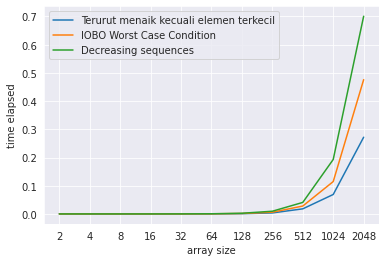

In [10]:
worst_case_obo_paper_time = []
for lst in worst_case_obo_paper_lst:
    worst_case_obo_paper_time.append(get_time_obosort(lst))
  
worst_case_obo_debunk_time = []
for lst in dec_lst:
    worst_case_obo_debunk_time.append(get_time_obosort(lst))

x = [i for i in range(1, len(size_lst)+1)]
plt.plot(x, worst_case_obo_paper_time)
plt.plot(x, obosort_ioboworst_time)
plt.plot(x, obosort_dec_time)
plt.xlabel('array size')
plt.ylabel('time elapsed')
labels = [f"{size}" for size in size_lst]
plt.legend(['Terurut menaik kecuali elemen terkecil', "IOBO Worst Case Condition", "Decreasing sequences"])
plt.xticks(x, labels)
plt.show()